In [1]:
import numpy as np
from simplemc.DriverMC import DriverMC
import corner
from getdist import plots, MCSamples
import getdist;

Hello, World! I am process 0 of 1 on isidro-pc
Initalizing nu density look up table... Done


## LCDM

In [ ]:
analysislcdm = DriverMC(analyzername='nested', model='LCDM', datasets='SN+HD', mcevidence=True);

In [ ]:
reslcdm = analysislcdm.executer(nlivepoints=200);

In [8]:
pars_labels_lcdm = ['${}$'.format(p.Ltxname) for p in analysislcdm.pars_info]

In [9]:
samples_lcdm = reslcdm['result']['samples']
weights_lcdm = reslcdm['result']['weights']

In [10]:
om1_lcdm = reslcdm['result']['samples'][:,0]
obh21_lcdm = reslcdm['result']['samples'][:,1]
h1_lcdm = reslcdm['result']['samples'][:,2]

## CPL

In [ ]:
analysiscpl = DriverMC(analyzername='nested', model='waCDM', datasets='SN+HD');

In [ ]:
rescpl = analysiscpl.executer(nlivepoints=200);

In [13]:
samples_cpl = rescpl['result']['samples']
weights_cpl = rescpl['result']['weights']

In [14]:
om1_cpl = rescpl['result']['samples'][:,0]
obh21_cpl = rescpl['result']['samples'][:,1]
h1_cpl = rescpl['result']['samples'][:,2]

## PolyCDM

In [ ]:
analysispoly = DriverMC(analyzername='nested', model='PolyCDM', datasets='SN+HD');

In [ ]:
respoly = analysispoly.executer(nlivepoints=200);

In [4]:
samples_poly = respoly['result']['samples']
weights_poly = respoly['result']['weights']

In [5]:
om1_poly = respoly['result']['samples'][:,0]
obh21_poly = respoly['result']['samples'][:,1]
h1_poly = respoly['result']['samples'][:,2]

## Plots and results

In [22]:
labels1 =  ['{}'.format(p.Ltxname) for p in analysislcdm.pars_info]
labels2 =  ['{}'.format(p.Ltxname) for p in analysiscpl.pars_info]
labels3 =  ['{}'.format(p.Ltxname) for p in analysispoly.pars_info]


samp1 = MCSamples(samples=samples_lcdm, names=labels1, labels = labels1, label=r'$\Lambda CDM$')
samp2 = MCSamples(samples=samples_cpl, names = labels2, labels = labels2, label=r'$CPL$')
samp3 = MCSamples(samples=samples_poly, names = labels3, labels = labels3, label=r'$PolyCDM$')

Removed no burn in
Removed no burn in
Removed no burn in


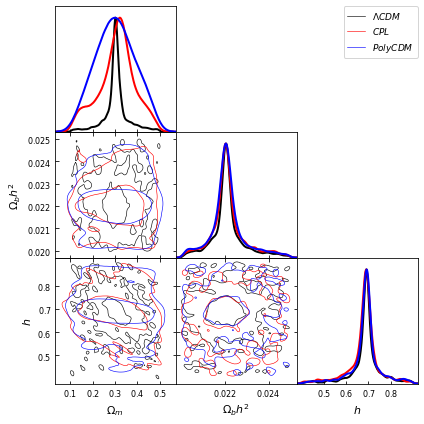

In [28]:
g = plots.get_subplot_plotter()
g.triangle_plot([samp1, samp2, samp3], filled=False, line_args={'lw':2},
                settings={ 'smooth_scale_2D':0.8, 'smooth_scale_1D':0.8},
                alphas=[1, 1, 1])
#                 analysis_settings={'ignore_rows':0.1, 'contours':[0.6, 0.6, 0.6]})
#                  ,  'smooth_scale_2D':0.9, 'smooth_scale_1D':0.5})

# plt.savefig('wacdm_samplers_getdist2.png', dpi=300)

In [29]:
reslcdm['result']['logz'], rescpl['result']['logz'], respoly['result']['logz']

(-28.946452963809694, -30.885772954457334, -29.821704661036545)

In [30]:
models = ['lcdm', 'cpl', 'polycdm']
for i, res in enumerate([reslcdm, rescpl, respoly]):
    print('${}: {:.4f}\pm{:.4f}$'.format(models[i], res['result']['logz'], res['result']['logzerr']))

$lcdm: -28.9465\pm0.1899$
$cpl: -30.8858\pm0.2246$
$polycdm: -29.8217\pm0.2032$
